In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fashion_train = pd.read_csv(r"C:\Users\97254\Desktop\fashion-mnist_train.csv")

In [2]:
# Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Data Splitting
from sklearn.model_selection import train_test_split

# Scailing
from sklearn.preprocessing import StandardScaler

In [5]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = fashion_train.drop('label', axis=1)
y = fashion_train.label

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Each row is a representation of an image.<br>
We will convert the data into scaled data and we will show a few images from the data.<br>
Of course the pictures are in black and white as we have 784 features, and we do not have three values for each feature that will express the colors.

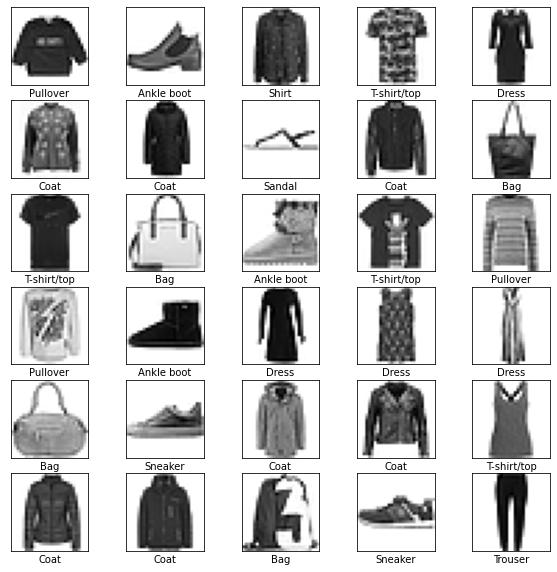

In [22]:
# Meaning of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scailing by dividing all in 255
input_data = fashion_train.iloc[:,1:] / 255
target = fashion_train[['label']].iloc[:, :]
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

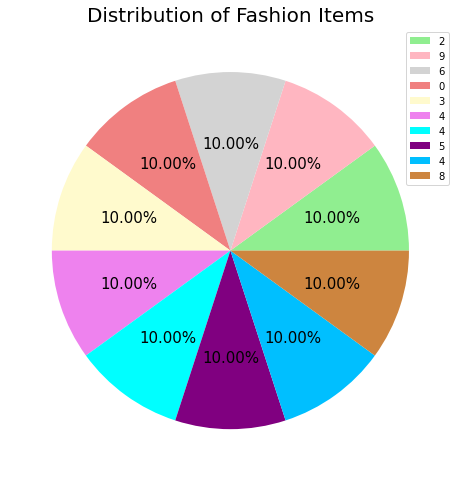

In [17]:
plt.subplots(figsize=(8, 9))
plt.pie(fashion_train['label'].value_counts(), colors = ['lightgreen', 'lightpink', 'lightgrey', 'lightcoral', 'lemonChiffon', 'violet', 'cyan', 'purple', 'deepskyblue', 'peru'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('Distribution of Fashion Items' , fontdict = {'fontsize' : 20})

plt.show()

As we can see, each item has the same amount of instances which means that the data is well divided.

During the semester we learned about the importance of dimensionality reduction.<br> We will now try to see this importance and then we will use dimensionality reduction.

Let's see how dimensionality reductiot is expressed in the images themselves.

In [29]:
pca = PCA(n_components=16)
X_reduced = pca.fit_transform(X_train)

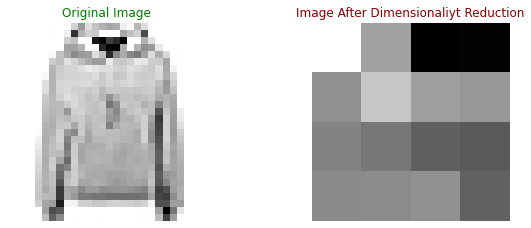

In [30]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(X_train.to_numpy()[2245].reshape(28,28) , cmap="gist_yarg")
plt.title("Original Image" , color="green")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(X_reduced[2245].reshape(4,4) , cmap="gist_yarg")
plt.title("Image After Dimensionaliyt Reduction" , color="darkred")
plt.axis("off")
plt.show()

It is very impressive that even in this situation the computer is able to detect a considerable amount of items and differentiate between them.<br>
Accordingly, we will try to understand how many dimensions we can reduce in order to achieve a satisfactory result.

In [23]:
# Give multiple pixel columns one name: features
features = ['pixel' + str(i+1) for i in range(input_data.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(input_data, columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = target['label']

# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
pca_df['result'] = results

In [24]:
pca_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,result
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2,Pullover
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0,6,Shirt
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,0,T-shirt/top
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,Dress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,Trouser
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0,8,Bag
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8,Bag


In [26]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1] 
pca_df['Third Dimension'] = pca_result[:,2]

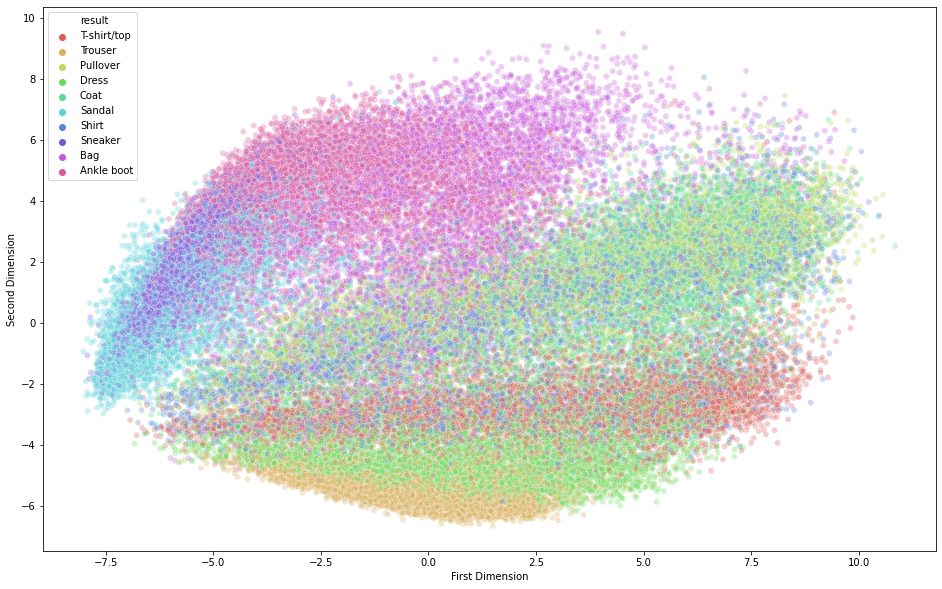

In [27]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

As we see, we do not have a clear ability to distinguish between the different labels when we use only two features.<br>
Let's try our abilities using three features.

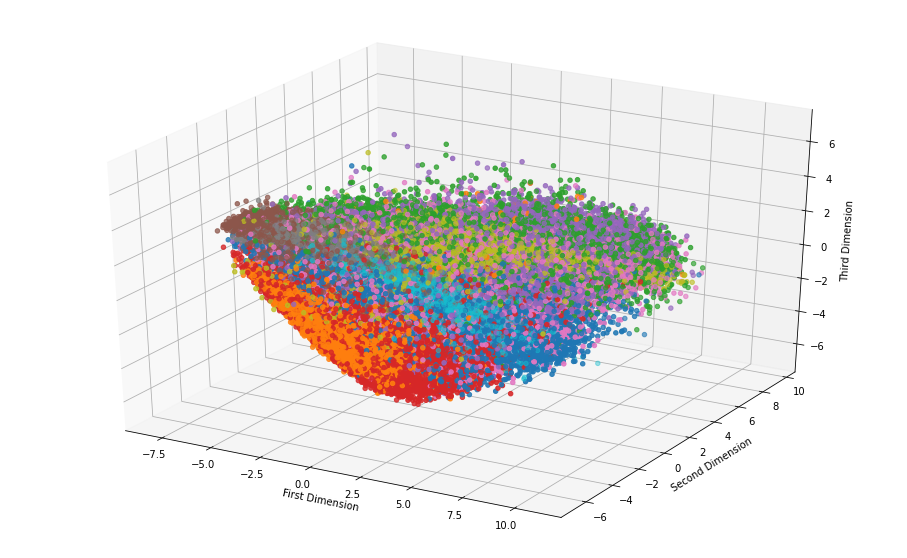

In [28]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

Again, it is not good enough for us.<br>
We will try to find the lowest value for which we can identify as many labels as we want.

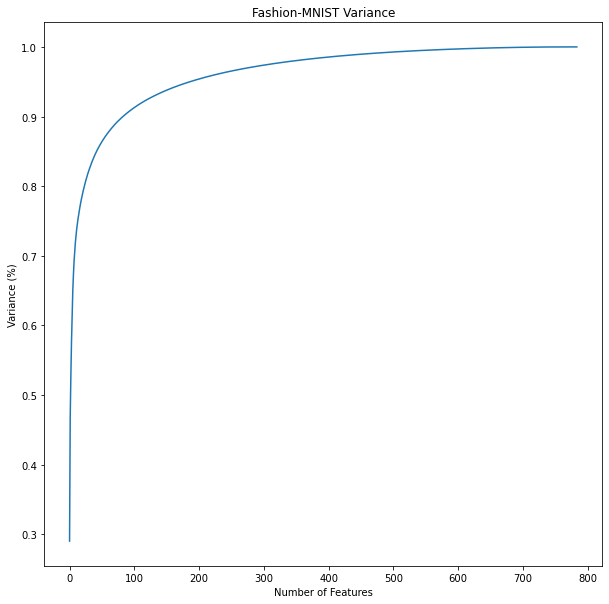

In [31]:
# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

We'll check only untill 150 because the accuracy is high enough for us.<br>
We'll use PIPLINE to evaluate the score of each model.<br>
Before starting we'll try to find the amount of features by using Decision Tree Classifier.

In [32]:
def PiplineScore(model , nComponents):
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                              ('pca' , PCA(n_components=nComponents)),
                               ('model' , model())])

    pipeline_model.fit(X_train, y_train)
    print(model() , "Accuracy :  " , pipeline_model.score(X_test, y_test))
    return pipeline_model.score(X_test, y_test)

In [33]:
k_range = list(range(1,150,20))
scores = []
for k in k_range:
    score = PiplineScore(DecisionTreeClassifier , k)
    scores.append(score)

DecisionTreeClassifier() Accuracy :   0.21308333333333335
DecisionTreeClassifier() Accuracy :   0.7623333333333333
DecisionTreeClassifier() Accuracy :   0.773
DecisionTreeClassifier() Accuracy :   0.77325
DecisionTreeClassifier() Accuracy :   0.7656666666666667
DecisionTreeClassifier() Accuracy :   0.7671666666666667
DecisionTreeClassifier() Accuracy :   0.7663333333333333
DecisionTreeClassifier() Accuracy :   0.7600833333333333


Text(0.5, 1.0, 'Decision Tree Classifier')

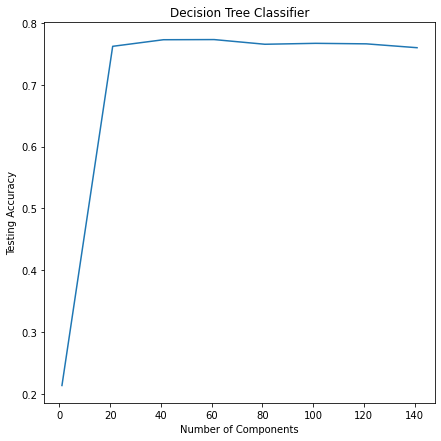

In [37]:
plt.figure(figsize=(7,7))
plt.plot(k_range, scores)
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.title('Decision Tree Classifier')

We can understand that between 0 to 20 is the most change in accuracy.<br>
We'll look for the most lowest number of components that still gives us an acceptable accuracy.

In [38]:
k_range = list(range(1,20))
scores_0_20 = []
for k in k_range:
    score = PiplineScore(DecisionTreeClassifier , k)
    scores_0_20.append(score)

DecisionTreeClassifier() Accuracy :   0.21308333333333335
DecisionTreeClassifier() Accuracy :   0.4409166666666667
DecisionTreeClassifier() Accuracy :   0.5539166666666666
DecisionTreeClassifier() Accuracy :   0.6385833333333333
DecisionTreeClassifier() Accuracy :   0.6784166666666667
DecisionTreeClassifier() Accuracy :   0.6960833333333334
DecisionTreeClassifier() Accuracy :   0.7104166666666667
DecisionTreeClassifier() Accuracy :   0.7159166666666666
DecisionTreeClassifier() Accuracy :   0.7275833333333334
DecisionTreeClassifier() Accuracy :   0.743
DecisionTreeClassifier() Accuracy :   0.7498333333333334
DecisionTreeClassifier() Accuracy :   0.7530833333333333
DecisionTreeClassifier() Accuracy :   0.757
DecisionTreeClassifier() Accuracy :   0.75225
DecisionTreeClassifier() Accuracy :   0.7605
DecisionTreeClassifier() Accuracy :   0.7610833333333333
DecisionTreeClassifier() Accuracy :   0.7593333333333333
DecisionTreeClassifier() Accuracy :   0.7640833333333333
DecisionTreeClassifier

Text(0.5, 1.0, 'Decision Tree Classifier')

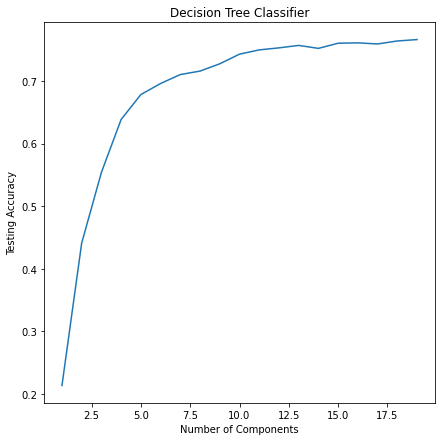

In [39]:
plt.figure(figsize=(7,7))
plt.plot(k_range, scores_0_20)
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.title('Decision Tree Classifier')

As we can see 10 has an acceptable accuracy and we will choose this number as our n_components number.

In [51]:
def PiplineScore10(model):
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                              ('pca' , PCA(n_components=10)),
                               ('model' , model)])

    pipeline_model.fit(X_train, y_train)
    print(model , "Accuracy :  " , pipeline_model.score(X_test, y_test))
    return pipeline_model.score(X_test, y_test)

For KNN model we'll look for the best k value.

KNeighborsClassifier(n_neighbors=1) Accuracy :   0.7803333333333333
KNeighborsClassifier(n_neighbors=3) Accuracy :   0.7978333333333333
KNeighborsClassifier() Accuracy :   0.8073333333333333
KNeighborsClassifier(n_neighbors=7) Accuracy :   0.8099166666666666
KNeighborsClassifier(n_neighbors=9) Accuracy :   0.8099166666666666
KNeighborsClassifier(n_neighbors=11) Accuracy :   0.8085
KNeighborsClassifier(n_neighbors=13) Accuracy :   0.8083333333333333
KNeighborsClassifier(n_neighbors=15) Accuracy :   0.8078333333333333
KNeighborsClassifier(n_neighbors=17) Accuracy :   0.806
KNeighborsClassifier(n_neighbors=19) Accuracy :   0.8063333333333333


Text(0, 0.5, 'Testing Accuracy')

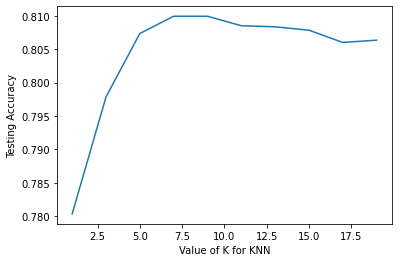

In [52]:
k_range = list(range(1, 20, 2))
scores = []
for k in k_range:
    score = PiplineScore10(KNeighborsClassifier(n_neighbors=k))
    scores.append(score)
     
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

We'll choose k=7 so we'll get the most high value of accuracy.

In [53]:
PiplineScore10(DecisionTreeClassifier())
PiplineScore10(LogisticRegression())
PiplineScore10(KNeighborsClassifier(n_neighbors=7))
PiplineScore10(AdaBoostClassifier())
PiplineScore10(XGBClassifier())
PiplineScore10(GradientBoostingClassifier())
PiplineScore10(RandomForestClassifier())

DecisionTreeClassifier() Accuracy :   0.7463333333333333
LogisticRegression() Accuracy :   0.7514166666666666
KNeighborsClassifier(n_neighbors=7) Accuracy :   0.8099166666666666
AdaBoostClassifier() Accuracy :   0.5523333333333333
[16:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob'

0.82325

We got some scores of models that we learned about.<br>
Now we'll try to put the best of them inside Stacking Classifier and Voting Classifier.

In [54]:
sc=StackingClassifier(estimators=[
                            ("pip1", KNeighborsClassifier(n_neighbors=7)),
                            ("pip2", XGBClassifier()),
                            ("pip3", GradientBoostingClassifier()),
                            ("pip4", RandomForestClassifier())
                                ])

In [55]:
PiplineScore10(sc)

[16:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.8288333333333333

In [56]:
sc2=StackingClassifier(estimators=[
                            ("pip1", KNeighborsClassifier(n_neighbors=7)),
                            ("pip2", XGBClassifier()),
                            ("pip3", GradientBoostingClassifier()),
                            ("pip4", RandomForestClassifier()),
                            ("pip5", LogisticRegression())
                                ])

In [57]:
PiplineScore10(sc2)

[17:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.8304166666666667

In [62]:
sc3=StackingClassifier(estimators=[
                            ("pip1", KNeighborsClassifier(n_neighbors=7)),
                            ("pip2", XGBClassifier()),
                            ("pip3", GradientBoostingClassifier()),
                            ("pip4", RandomForestClassifier()),
                            ("pip5", LogisticRegression()),
                            ("pip6", DecisionTreeClassifier())
                                ])

In [63]:
PiplineScore10(sc3)

[17:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.8301666666666667

In [58]:
vc=VotingClassifier(estimators=[
                            ("pip1", KNeighborsClassifier(n_neighbors=7)),
                            ("pip2", XGBClassifier()),
                            ("pip3", GradientBoostingClassifier()),
                            ("pip4", RandomForestClassifier())
                                ])

In [59]:
PiplineScore10(vc)

[17:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier(estimators=[('pip1', KNeighborsClassifier(n_neighbors=7)),
                             ('pip2',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, ma

0.8213333333333334

In [60]:
vc2=VotingClassifier(estimators=[
                            ("pip1", KNeighborsClassifier(n_neighbors=7)),
                            ("pip2", XGBClassifier()),
                            ("pip3", GradientBoostingClassifier()),
                            ("pip4", RandomForestClassifier()),
                            ("pip5", LogisticRegression())
                                ])

In [61]:
PiplineScore10(vc2)

[17:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier(estimators=[('pip1', KNeighborsClassifier(n_neighbors=7)),
                             ('pip2',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, ma

0.8194166666666667

The best score we got was sc2's score.<br>
We'll use this model for our final model.

In [64]:
fashion_test = pd.read_csv(r"C:\Users\97254\Desktop\fashion-mnist_test.csv")
finalX_train = fashion_train.drop(['label'],axis=1)
finalY_train = fashion_train.label
finalX_test = fashion_test.drop(['label'],axis=1)
finalY_test = fashion_test.label

In [65]:
def PiplineScore10Final():
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                              ('pca' , PCA(n_components=10)),
                              ('model' , StackingClassifier(estimators=[
                                                                       ("pip1", KNeighborsClassifier(n_neighbors=7)),
                                                                       ("pip2", XGBClassifier()),
                                                                       ("pip3", GradientBoostingClassifier()),
                                                                       ("pip4", RandomForestClassifier()),
                                                                       ("pip5", LogisticRegression()) ]))
                               ])

    pipeline_model.fit(finalX_train , finalY_train)
    return pipeline_model.score(finalX_test , finalY_test)